In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Training data exploration ##

In [33]:
#Load random sample from train.csv
import random

filename = 'Data\\train.csv'
n = sum(1 for line in open(filename)) - 1 #number of records in file
s = 200000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
train_data = pd.read_csv(filename, skiprows=skip)

In [34]:
#Load features.csv
features = pd.read_csv('Data\\features.csv')

### Training data

In [35]:
train_data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,-0.001047,-0.002700,0.000743,0.004667,0.001282,-1,-1.499681,-1.928023,...,NaN,0.337112,4.079450,0.613967,6.622410,0.799525,5.231833,0.360831,3.922324,5
1,0,0.405199,0.005290,0.008046,0.010947,0.012894,0.010657,1,0.430999,-0.566564,...,NaN,0.620526,3.590086,1.328633,7.298527,1.737351,5.730919,0.846331,3.784673,18
2,0,1.932131,0.000726,0.002271,-0.001161,-0.005704,-0.001758,1,-0.210944,-0.791918,...,NaN,1.015644,5.920381,0.553876,6.398648,0.715738,5.038656,0.578121,4.452278,24
3,0,119.137190,-0.003248,-0.003826,-0.001878,0.000884,-0.001324,-1,4.223937,4.004195,...,NaN,-1.410107,0.609500,-1.044982,1.456225,-1.632080,1.185489,-1.335729,1.240240,34
4,0,1.150897,-0.002724,-0.003229,0.000046,0.001423,-0.000789,-1,-2.537617,-2.550776,...,NaN,-1.236871,1.048022,-1.044237,1.464073,-1.628817,1.196283,-1.320741,1.278507,37


In [37]:
train_data.shape

(200000, 138)

In [38]:
train_data[train_data['weight']==0].shape

(34487, 138)

In [39]:
#Remove records with weight=0
train_data_ = train_data[train_data['weight']!=0]

In [10]:
#train_data_ = train_data_.dropna()

In [40]:
train_data_.shape

(165513, 138)

NAs:

In [63]:
train_data_.columns[train_data_.isnull().any()]

Index(['feature_3', 'feature_4', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_44', 'feature_45', 'feature_55',
       'feature_56', 'feature_59', 'feature_72', 'feature_73', 'feature_74',
       'feature_75', 'feature_76', 'feature_78', 'feature_79', 'feature_80',
       'feature_81', 'feature_82', 'feature_84', 'feature_85', 'feature_86',
       'feature_87', 'feature_88', 'feature_90', 'feature_91', 'feature_92',
       'feature_93', 'feature_94', 'feature_96', 'feature_97', 'feature_98',
       'feature_99', 'feature_100', 'feature_102', 'feature_103',
       'feature

In [57]:
test = pd.read_csv('Data\\example_test.csv')

In [60]:
test.columns[test.isnull().any()]

Index(['feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_55', 'feature_56', 'feature_72', 'feature_73', 'feature_74',
       'feature_75', 'feature_76', 'feature_78', 'feature_79', 'feature_80',
       'feature_81', 'feature_82', 'feature_84', 'feature_85', 'feature_86',
       'feature_87', 'feature_88', 'feature_90', 'feature_91', 'feature_92',
       'feature_93', 'feature_94', 'feature_96', 'feature_97', 'feature_98',
       'feature_99', 'feature_100', 'feature_102', 'feature_103',
       'feature_104', 'feature_105', 'feature_106', 'feature_108',
       'feature_109', '

Resp features:

In [69]:
train_data_[['resp_1','resp_2','resp_3','resp_4','resp']]

,resp_1,resp_2,resp_3,resp_4,resp
1,0.005290,0.008046,0.010947,0.012894,0.010657
2,0.000726,0.002271,-0.001161,-0.005704,-0.001758
3,-0.003248,-0.003826,-0.001878,0.000884,-0.001324
4,-0.002724,-0.003229,0.000046,0.001423,-0.000789
5,0.126417,0.147485,0.049301,-0.058998,0.061697
...,...,...,...,...,...
199990,-0.000618,-0.000618,-0.015429,-0.077939,-0.085305
199991,-0.000371,-0.000371,0.010995,0.057358,0.050335
199992,0.000559,0.000559,-0.000930,-0.002515,-0.000421
199994,0.001203,0.001203,0.000752,0.035829,0.039893


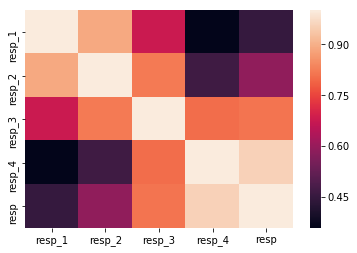

In [68]:
import seaborn as sns

sns.heatmap(train_data_[['resp_1','resp_2','resp_3','resp_4','resp']].corr())
plt.show()

### Features

In [12]:
features.head()

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,feature_1,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,feature_2,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,feature_3,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,feature_4,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [13]:
features = features.set_index('feature')

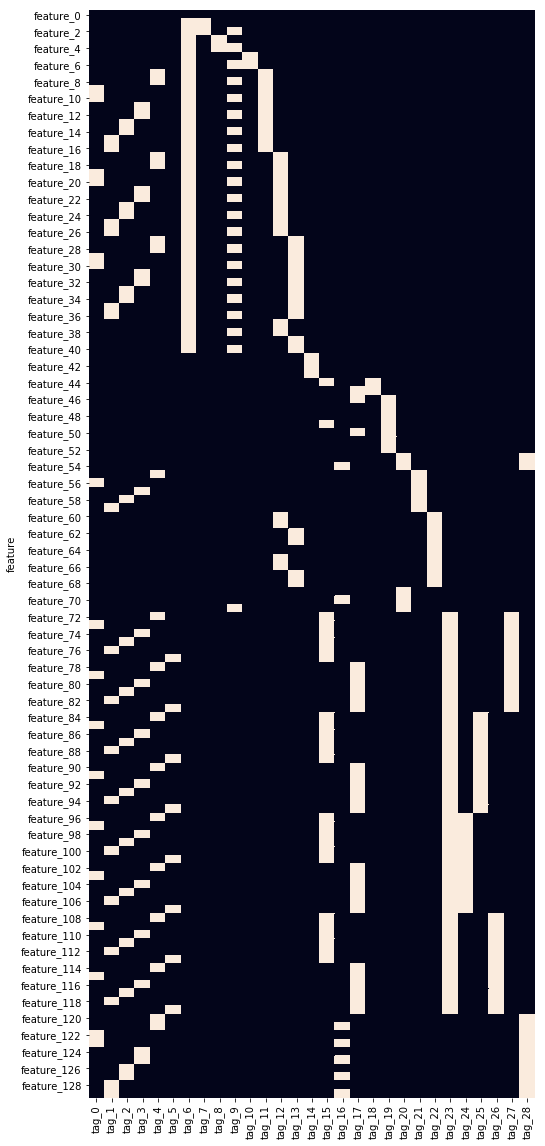

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,20))     
sns.heatmap(features*1,cbar=False)
plt.show()